importing libraries

## 1 Importando librerías 

In [215]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


reading dataframe and checking data types

### 1.1 Leyendo dataframe y verificando tipos de datos

In [92]:
df = pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [93]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2 Preparando datos

### 2.1 Renombrando columnas a snake_case

In [94]:
df.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release',
                   'Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales',
                   'Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'},inplace=True)

df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2 Verificando columnas con valores NaN

In [95]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [96]:
df[df['platform'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [97]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [98]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [99]:
df[df['critic_score'].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [100]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### 2.2.1 Decidimos rellenar los valores NaN de la columna 'year_of_release' con el valor 2999 (fecha inexistente) para poder trabajar con los datos

In [101]:
df['year_of_release'].fillna(2999,inplace=True)

In [102]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### 2.2.2 Decidimos eliminar los dos registros que no cuentan con el campo "name" y pertenecen a la plataforma "GEN"debido a que no nos sirven para nuestro estudio, al igual que representan una cantidad muy pequeña de datos que no generará resultados tendenciosos

In [103]:
df=df[~df['name'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [104]:
#Revisando valores tbd
#df[df.isin(['tbd']).any(axis=1)]

### 2.2.3 Decidimos rellenar los valores NaN de la columna 'rating' con el valor 'UN' (Undetermined), no sería inteligente eliminarlos debido a que son representativos para el estudio.

In [105]:
df['rating'].fillna('UN',inplace=True)
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### 2.2.4 Decidimos rellenar los valores NaN de la columna 'critic_score' con el valor numérico 105, esto debido a que es un valor fuera de rango (0-100) y de esta manera podemos filtrarlo para omitirlos en caso de ser necesario, sin perder la posibilidad de analizar el resto de su información, que puede ser representativa para el estudio.

In [106]:
df['critic_score'].fillna(105,inplace=True)
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### 2.2.4 Decidimos rellenar los valores NaN de la columna 'user_score' con el valor numérico 11, esto debido a que es un valor fuera de rango (0-10) y de esta manera podemos filtrarlo para omitirlos en caso de ser necesario, sin perder la posibilidad de analizar el resto de su información, que puede ser representativa para el estudio.

In [107]:
df['user_score'].fillna(11,inplace=True)
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### 2.3 Verificando que no tengamos ningún valor NaN restante en el DataFrame, así como la información del mismo

In [108]:
df.isna().any()

name               False
platform           False
year_of_release    False
genre              False
na_sales           False
eu_sales           False
jp_sales           False
other_sales        False
critic_score       False
user_score         False
rating             False
dtype: bool

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### 2.3.1 Cambiando el tipo de dato de la columna 'year_of_release' de tipo  flotante (float64) por  entero (int)

In [110]:
df['year_of_release']= df['year_of_release'].astype(int)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


### 2.4 Verificando valores 'To Be Determined' en columna 'user_score'

##### 2.4.1 Verificando a que años pertenecen los videojuegos con calificación 'To Be Determined'

In [112]:
#Revisando valores tbd
df_tbd =df[df.isin(['tbd']).any(axis=1)]
df_tbd.groupby('year_of_release')['user_score'].count()

year_of_release
1997      1
1999      8
2000     43
2001     82
2002    192
2003     95
2004    107
2005    121
2006    124
2007    192
2008    326
2009    405
2010    331
2011    217
2012     24
2013     15
2014     21
2015     38
2016     34
2999     48
Name: user_score, dtype: int64

#####  Los valores To be determined en la columna 'user_score' indican que el videojuego no ha recibido sufucientes reseñas por parte de los usuarios para calcular una calificiación promedio, por lo tanto los mantendremos con ese valor

### 2.5 Calculando las ventas totales para cada juego

In [113]:
#df[df['name']=='Wii Sports']
df ['total_sales']= df['na_sales'] + df['eu_sales'] +df['jp_sales'] + df['other_sales']
df


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,105.0,11,UN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,105.0,11,UN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,105.0,11,UN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,105.0,11,UN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,105.0,11,UN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,105.0,11,UN,0.01


## 3 Analizando los datos

In [114]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,105.0,11,UN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,105.0,11,UN,31.38


### 3.1 ¿Cuántos juegos fueron lazados en diferentes años?

In [115]:
game_years_df= df.groupby('year_of_release')['name'].count().reset_index()
game_years_serie= df.groupby('year_of_release')['name'].count()
game_years_df.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


In [116]:
max=game_years_serie.idxmax()
min=game_years_serie.idxmin()
print(f"el año con menor cantidad de juegos lanzados fue {game_years_df.loc[game_years_df['year_of_release']==min]['year_of_release'].values[0]}, la cantidad de juegos lanzados en ese año fue {game_years_df.loc[game_years_df['year_of_release']==min]['name'].values[0]} juegos")
print()
print(f"el año con menor cantidad de juegos lanzados fue {game_years_df.loc[game_years_df['year_of_release']==max]['year_of_release'].values[0]}, la cantidad de juegos lanzados en ese año fue {game_years_df.loc[game_years_df['year_of_release']==max]['name'].values[0]} juegos")

el año con menor cantidad de juegos lanzados fue 1980, la cantidad de juegos lanzados en ese año fue 9 juegos

el año con menor cantidad de juegos lanzados fue 2008, la cantidad de juegos lanzados en ese año fue 1427 juegos


In [117]:
df_1980=df[df['year_of_release']==1980]
df_1980.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
262,Asteroids,2600,1980,Shooter,4.00,0.26,0.0,0.05,105.0,11,UN,4.31
546,Missile Command,2600,1980,Shooter,2.56,0.17,0.0,0.03,105.0,11,UN,2.76
1764,Kaboom!,2600,1980,Misc,1.07,0.07,0.0,0.01,105.0,11,UN,1.15
1968,Defender,2600,1980,Misc,0.99,0.05,0.0,0.01,105.0,11,UN,1.05
2650,Boxing,2600,1980,Fighting,0.72,0.04,0.0,0.01,105.0,11,UN,0.77


In [118]:
print("la cantidad de plataformas que existían en el 2008 eran: ",len(df_1980.platform.unique()))
print(f"Las ventas totales del videojuego más popular en 2008 fueron: { round(df_1980['total_sales'].max(), 2) } Millones de dólares")

la cantidad de plataformas que existían en el 2008 eran:  1
Las ventas totales del videojuego más popular en 2008 fueron: 4.31 Millones de dólares


In [119]:
df_2008=df[df['year_of_release']==2008]
df_2008.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
39,Super Smash Bros. Brawl,Wii,2008,Fighting,6.62,2.55,2.66,1.01,93.0,8.9,T,12.84
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
90,Pokémon Platinum Version,DS,2008,Role-Playing,2.76,1.72,2.69,0.54,83.0,8.5,E,7.71


In [120]:
print("la cantidad de plataformas que existían en el 2008 eran: ",len(df_2008.platform.unique()))
print(f"Las ventas totales del videojuego más popular en 2008 fueron: { round(df_2008['total_sales'].max(), 2) } Millones de dólares")

la cantidad de plataformas que existían en el 2008 eran:  9
Las ventas totales del videojuego más popular en 2008 fueron: 35.52 Millones de dólares


Podemos observar que:
* La cantidad de juegos lanzados en 1980 solamente se lanzaron 9 juegos, estos solo fueron lanzados en la plataforma 'Atari 2600'
* En 2008 se lanzaron 2008 juegos en 9 plataformas diferentes, entre ellas: 'Wii, X360, PS3, DS' etc.


* La cantidad de ventas totales del juego más popular en 1980 fue de 4.31 Millones de dólares
* La cantidad de ventas totales del juego más popular en 2008 fue de 35.52 Millones de dólares

    * A comparación de 1980, en 2008 juego más popular obtuvo 8.24 veces más ingresos que su contraparte en 1980

## 3.2 ¿Cómo varian las ventas de una plataforma a otra?  

*Comparativa año con año*

In [124]:
platform_group = df.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
print(len(platform_group))
platform_group.reset_index(drop=True,inplace=True)
platform_group

31


,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [128]:
#las 5 plataformas con mayores ventas históricas
platform_top=platform_group.head(5)
platform_top

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


In [153]:
platform_top_list=platform_top['platform'].to_list()
print(platform_top_list)
test1 = df[df['platform'].isin(platform_top_list)]
test1.groupby(['platform','year_of_release'])['year_of_release'].sum()

#df.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)

['PS2', 'X360', 'PS3', 'Wii', 'DS']


platform  year_of_release
DS        1985                 1985
          2004                46092
          2005               236590
          2006               403206
          2007               754632
                              ...  
X360      2013               150975
          2014               126882
          2015                70525
          2016                26208
          2999                89970
Name: year_of_release, Length: 62, dtype: int32

In [152]:
df[df['platform']=='DS'].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,105.0,11,UN,0.02
10940,Puyo Pop Fever (JP sales),DS,2004,Puzzle,0.00,0.00,0.09,0.00,105.0,11,UN,0.09
14161,Puyo Pop Fever(us sales),DS,2004,Puzzle,0.03,0.00,0.00,0.00,105.0,11,UN,0.03
9148,Mr. Driller: Drill Spirits,DS,2004,Puzzle,0.08,0.00,0.05,0.01,70.0,8.9,E,0.14
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,105.0,11,UN,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...
10764,Luminous Arc 2 (JP sales),DS,2999,Role-Playing,0.00,0.00,0.10,0.00,105.0,11,UN,0.10
3081,LEGO Harry Potter: Years 5-7,DS,2999,Action,0.34,0.25,0.00,0.07,69.0,tbd,E10+,0.66
14126,Housekeeping,DS,2999,Action,0.00,0.00,0.04,0.00,105.0,11,UN,0.04
11790,Mega Man Battle Network: Operation Shooting Star,DS,2999,Role-Playing,0.00,0.00,0.07,0.00,105.0,11,UN,0.07


### 3.2.1 Observamos que el videojuego 'Strongest Tokyo University Shogi DS	' tiene inconsistencias, según la base de datos fue lanzado para la plataforma 'DS' en 1985, sin embargo corroborando en datos online observamos que el juego fue lanzado en Mayo de 2007, por lo tanto corregiremos el dato y continuaremos con el análisis

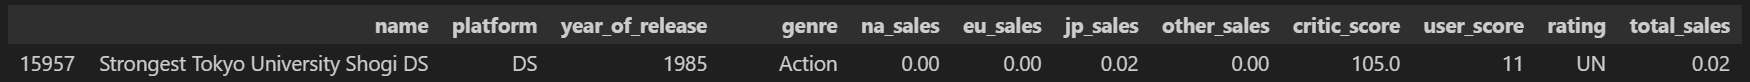

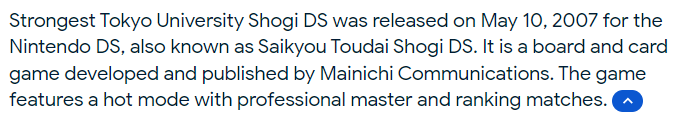

In [165]:
#df[df['name']=='Strongest Tokyo University Shogi DS']['year_of_release'] = 2007
df.loc[15957,'year_of_release'] = 2007
df[df['name']=='Strongest Tokyo University Shogi DS']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,2007,Action,0.0,0.0,0.02,0.0,105.0,11,UN,0.02


### 3.2.3 Regresamos al análisis de las ventas por plataforma

In [199]:
print(platform_top_list)
test1 = df[df['platform'].isin(platform_top_list)]
t1 = test1.groupby(['platform','year_of_release'])['year_of_release'].sum()
t1

['PS2', 'X360', 'PS3', 'Wii', 'DS']


platform  year_of_release
DS        2004                46092
          2005               236590
          2006               403206
          2007               756639
          2008               987936
                              ...  
X360      2013               150975
          2014               126882
          2015                70525
          2016                26208
          2999                89970
Name: year_of_release, Length: 61, dtype: int32

In [183]:
t1['PS2']

year_of_release
2000    164000
2001    370185
2002    560560
2003    512768
2004    519036
2005    521300
2006    519554
2007    429498
2008    383528
2009    192864
2010     76380
2011     14077
2999    101966
Name: year_of_release, dtype: int32

In [214]:
t2= pd.DataFrame(t1)
t2.rename(columns={'year_of_release':'total_sales'},inplace=True)
t2.reset_index(inplace=True)
t2
#t2.set_index('year_of_release')


,platform,year_of_release,total_sales
0,DS,2004,46092
1,DS,2005,236590
2,DS,2006,403206
3,DS,2007,756639
4,DS,2008,987936
...,...,...,...
56,X360,2013,150975
57,X360,2014,126882
58,X360,2015,70525
59,X360,2016,26208


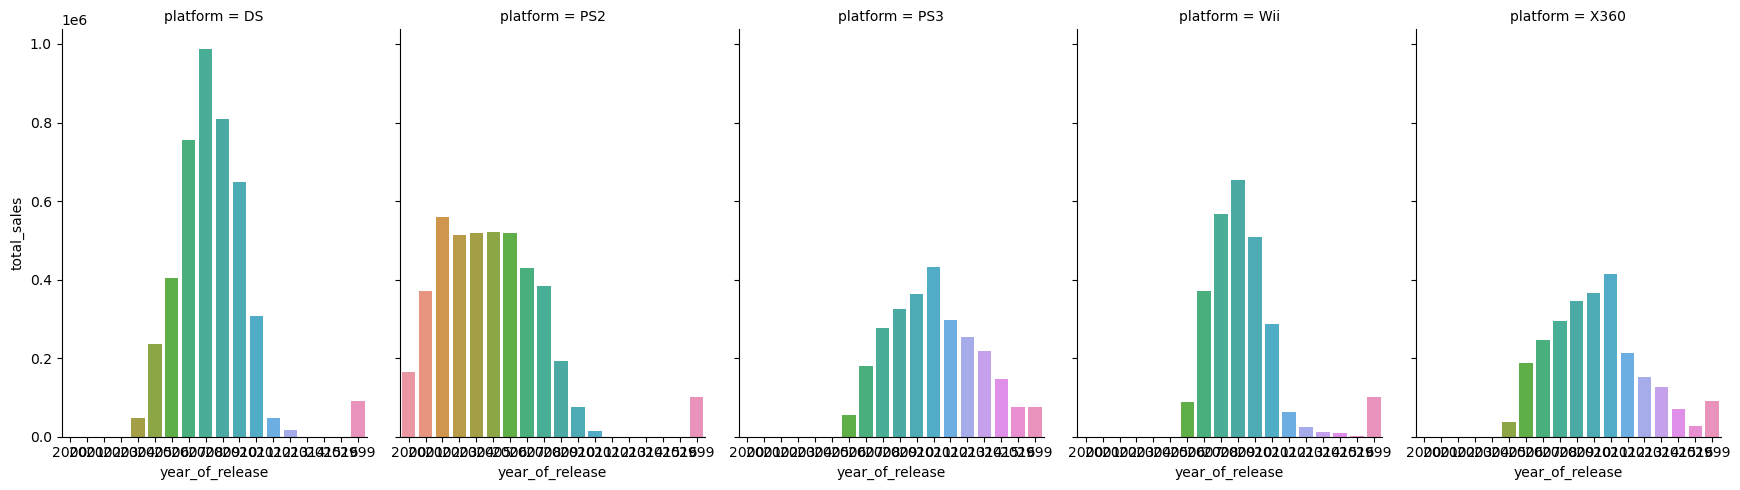

In [235]:
sns.catplot(kind='bar',data=t2, x='year_of_release',y='total_sales',col='platform',  aspect=.7)


<Axes: xlabel='year_of_release'>

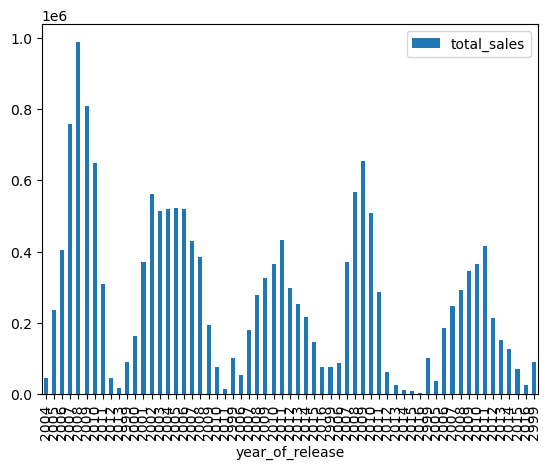

In [211]:
#t2.plot(kind='bar',x='year_of_release')

In [205]:
pd.melt(t2, id_vars='year_of_release', value_vars='total_sales')

KeyError: 'year_of_release'